In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import time
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import roc_curve, accuracy_score, precision_score, mean_squared_error, confusion_matrix, classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.feature_selection import RFE, SelectPercentile, f_classif, VarianceThreshold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE, SelectFromModel
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("Employee.csv")

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.shape

(4653, 9)

In [5]:
df.isnull().sum().sort_values(ascending=False)

LeaveOrNot                   0
ExperienceInCurrentDomain    0
EverBenched                  0
Gender                       0
Age                          0
PaymentTier                  0
City                         0
JoiningYear                  0
Education                    0
dtype: int64

In [6]:
df.isna().sum().sort_values(ascending=False)

LeaveOrNot                   0
ExperienceInCurrentDomain    0
EverBenched                  0
Gender                       0
Age                          0
PaymentTier                  0
City                         0
JoiningYear                  0
Education                    0
dtype: int64

In [7]:
df['Education'] = le.fit_transform(df['Education'])
df['City'] = le.fit_transform(df['City'])
df['Gender'] = le.fit_transform(df['Gender'])
df['EverBenched'] = le.fit_transform(df['EverBenched'])

In [8]:
df.dtypes

Education                    int32
JoiningYear                  int64
City                         int32
PaymentTier                  int64
Age                          int64
Gender                       int32
EverBenched                  int32
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
dtype: object

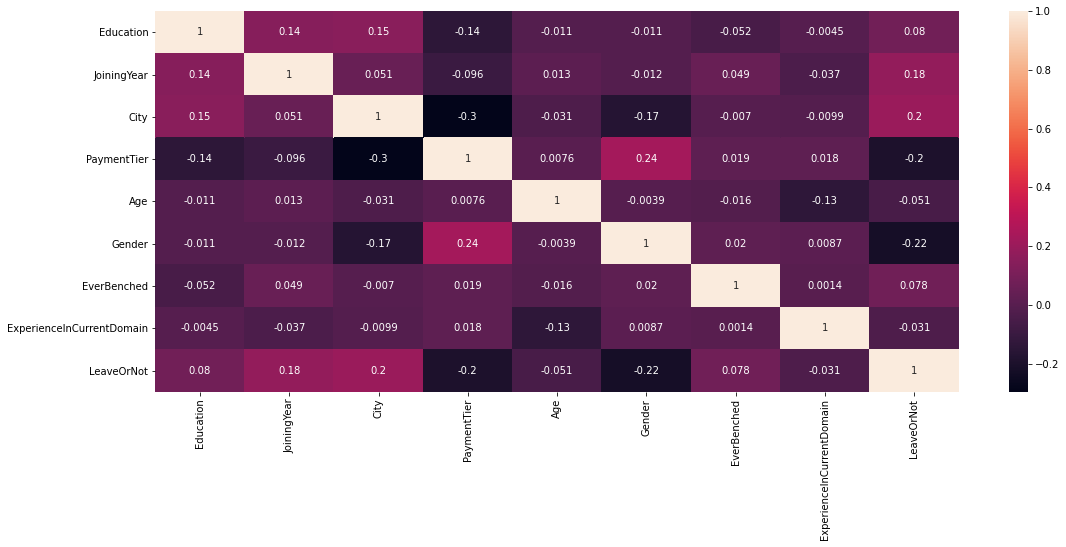

In [9]:
corr = df.corr()
plt.figure(figsize=(18,7))
sns.heatmap(corr, annot = True)
plt.show()

In [10]:
y = df['LeaveOrNot']
X = df.drop('LeaveOrNot', axis = 1)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10086)

In [12]:
# LR

LRstart_time = datetime.now()
logRegModel = LogisticRegression(random_state=5, solver='liblinear').fit(X_train, y_train)
logRegModel.score(X_train, y_train)
y_predict = logRegModel.predict(X_test)
lrcm = confusion_matrix(y_test,y_predict)

print('Speed:', datetime.now() - LRstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print('Confusion Matrix:')
print(pd.DataFrame(lrcm))
print("Classification Report:")
print(classification_report(y_test, y_predict))

Speed: 0:00:00.324734
Accuracy: 0.7089151450053706
Confusion Matrix:
     0    1
0  551   62
1  209  109
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       613
           1       0.64      0.34      0.45       318

    accuracy                           0.71       931
   macro avg       0.68      0.62      0.62       931
weighted avg       0.70      0.71      0.68       931



In [13]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.596391
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             LeaveOrNot   No. Observations:                 3722
Model:                          Logit   Df Residuals:                     3714
Method:                           MLE   Df Model:                            7
Date:                Sat, 11 Dec 2021   Pseudo R-squ.:                 0.07384
Time:                        18:05:23   Log-Likelihood:                -2219.8
converged:                       True   LL-Null:                       -2396.7
Covariance Type:            nonrobust   LLR p-value:                 1.780e-72
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Education                     0.2102      0.067      3.117      0.002       0.

In [14]:
# RF
RFstart_time = datetime.now()

rfclass=RandomForestClassifier(n_estimators=20,random_state=0)
rfclass.fit(X_train, y_train)
rfypred=rfclass.predict(X_test)
rfclass.score(X_test, y_test)
rfcm = confusion_matrix(y_test,rfypred)

print('Speed:', datetime.now() - RFstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, rfypred))
print('Confusion Matrix:')
print(pd.DataFrame(rfcm))
print("Classification Report:")
print(classification_report(y_test, rfypred))

Speed: 0:00:00.181227
Accuracy: 0.8378088077336198
Confusion Matrix:
     0    1
0  561   52
1   99  219
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       613
           1       0.81      0.69      0.74       318

    accuracy                           0.84       931
   macro avg       0.83      0.80      0.81       931
weighted avg       0.84      0.84      0.83       931



In [15]:
rfimp = rfclass.feature_importances_
df_cof_RF = pd.Series(rfimp,X.columns)
df_cof_RF

Education                    0.101928
JoiningYear                  0.332817
City                         0.106035
PaymentTier                  0.093654
Age                          0.176458
Gender                       0.090226
EverBenched                  0.019098
ExperienceInCurrentDomain    0.079783
dtype: float64

<AxesSubplot:>

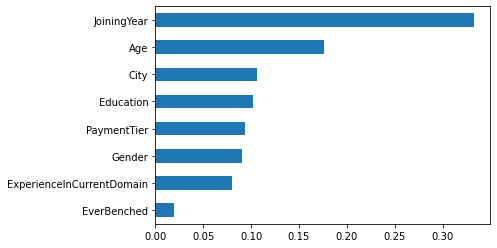

In [16]:
df_cof_RF.head(18).sort_values().plot.barh()

In [17]:
# NN
NNstart_time = datetime.now()

nnclass=MLPClassifier(3,solver='lbfgs', learning_rate_init= 0.01, max_iter=100).fit(X_train, y_train)
nnypred=nnclass.predict(X_test)
nnclass.score(X_test, y_test)
nnclass.predict_proba(X_test[:1])
nncm = confusion_matrix(y_test,nnypred)

print('Speed:', datetime.now() - NNstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, nnypred))
print('Confusion Matrix:')
print(pd.DataFrame(nncm))
print("Classification Report:")
print(classification_report(y_test, nnypred))

Speed: 0:00:00.257046
Accuracy: 0.6584317937701396
Confusion Matrix:
     0  1
0  613  0
1  318  0
Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       613
           1       0.00      0.00      0.00       318

    accuracy                           0.66       931
   macro avg       0.33      0.50      0.40       931
weighted avg       0.43      0.66      0.52       931

